In [504]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

## Preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,QuantileTransformer,MinMaxScaler

In [505]:
df = pd.read_csv("train-csv.txt")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [506]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0.0,unknown,no


In [507]:
df_org = df[["age", "job", 'marital', 'education', 'balance', 'housing', 'loan',]]

In [508]:
df_org.describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


In [509]:
df_org.job.value_counts().index

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

In [510]:
df_org.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [511]:
df_org.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [512]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [513]:
df_org.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [514]:
df_org.drop(df_org[df_org.balance < 1].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [515]:
StdScl = StandardScaler()
df_org['SS_balance'] = StdScl.fit_transform(df_org['balance'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [516]:
df_org.drop(df_org[df_org.SS_balance > 3].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [517]:
df_org.drop("SS_balance", axis = 1 , inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [518]:
df_original=df_org.copy()
print(df_original.shape,df_org.shape)

(37296, 7) (37296, 7)


In [519]:
df_org.describe()

,age,balance
count,37296.000000,37296.000000
mean,40.930153,1356.857411
std,10.738285,1849.358910
min,18.000000,1.000000
25%,32.000000,222.000000
50%,39.000000,625.500000
75%,48.000000,1670.000000
max,95.000000,11371.000000


In [520]:
df_org.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan'], dtype='object')

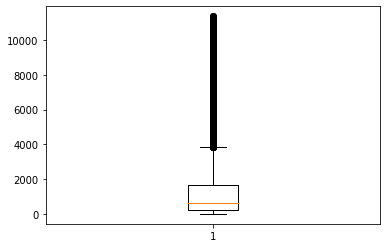

In [521]:
plt.boxplot(df_org.balance)
plt.show()

In [522]:
QT = QuantileTransformer(output_distribution='normal')
df_org['age'] = QT.fit_transform(df_org['age'].values.reshape(-1,1))
MinMax = MinMaxScaler()
df_org['age'] = MinMax.fit_transform(df_org['age'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


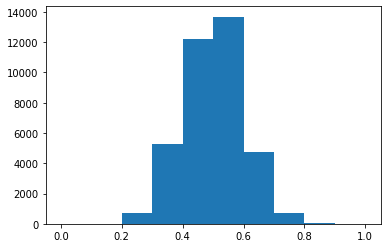

In [523]:
plt.hist(df_org['age'])
plt.show()

In [524]:
QT = QuantileTransformer(output_distribution='normal')
df_org['balance'] = QT.fit_transform(df_org['balance'].values.reshape(-1,1))
MinMax = MinMaxScaler()
df_org['balance'] = MinMax.fit_transform(df_org['balance'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


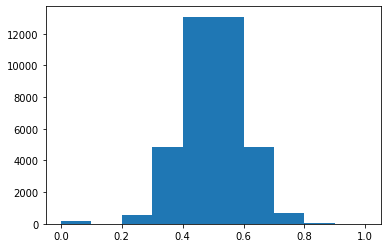

In [525]:
plt.hist(df_org['balance'])
plt.show()

In [526]:
#["age", "job", 'marital', 'education', 'balance', 'housing', 'loan',]
transformer = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse = True, drop = 'first'),['job','marital',]),
    ('tnf3', OrdinalEncoder(categories= [(["unknown","primary", "secondary",'tertiary',])]),['education',]),  
    ('tnf4', OrdinalEncoder(categories= [(["no","yes",])]),['housing',]),
    ('tnf5', OrdinalEncoder(categories= [(["no","yes",])]),['loan',]),
], remainder= 'passthrough')


In [527]:
df_org = transformer.fit_transform(df_org)

In [528]:
df_org.shape

(37296, 18)

In [541]:
from sklearn.cluster import KMeans
from sklearn import metrics

for n_clusters in range(8,11):

    kmeans = KMeans(n_clusters=n_clusters, random_state=0, algorithm = 'elkan')
    kmeans = kmeans.fit(df_org)
    print("Silhouette Score = {}\n".format(metrics.silhouette_score(df_org,kmeans.labels_)))
    
    df_original.reset_index(inplace = True,drop = True)
    result = pd.concat([df_original, pd.DataFrame({'cluster':kmeans.labels_})],axis=1,)
    result = result.sort_values(by=['cluster'], ascending=[True])
    #result.drop('index',axis = 1, inplace = True)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):    

      print('{}\t{}\t\t{}'.format('Cluster', 'Age', 'Balance'))
      print('{}'.format('-' * 80))
      for cluster in result.cluster.unique():
        print('{}\t{:.2f} ({:.2f})\t{:.2f} ({:.2f})\t'.format
        (cluster, result[result.cluster==cluster].age.mean()
        , result[result.cluster==cluster].age.std()
        , result[result.cluster==cluster].balance.mean()
        , result[result.cluster==cluster].balance.std()))
        print('{}'.format('-' * 80))
        print()
        #plt.show()
        print('{}'.format('-' * 80))

Silhouette Score = 0.23166202876219152

Cluster	Age		Balance
--------------------------------------------------------------------------------
0	33.40 (7.79)	1129.95 (1665.04)	
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
1	40.28 (8.68)	1170.45 (1612.26)	
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
2	42.00 (9.03)	1572.83 (2021.67)	
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
3	50.68 (13.44)	1588.34 (2058.83)	
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
4	47.44 (11.37)	1507.96 (1954.30)	
----------------------------------

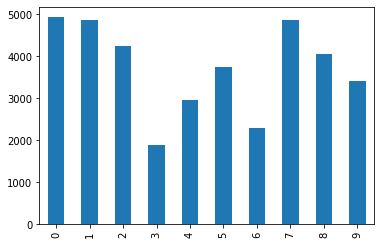

In [542]:
result.cluster.value_counts().sort_index().plot(kind = 'bar')

In [543]:
result

,age,job,marital,education,balance,housing,loan,cluster
37295,37,entrepreneur,married,secondary,2971,no,no,0
7928,52,management,divorced,secondary,944,no,yes,0
7927,56,services,divorced,secondary,450,no,no,0
20612,34,admin.,married,secondary,131,no,no,0
20614,29,blue-collar,married,secondary,659,no,no,0
...,...,...,...,...,...,...,...,...
27213,30,technician,single,secondary,3313,yes,no,9
33805,34,services,single,secondary,528,yes,no,9
27216,32,services,single,secondary,48,yes,no,9
1720,40,services,single,secondary,737,yes,no,9


In [540]:
result.cluster.sort_values(ascending = False)

37156    1
7206     1
7627     1
7630     1
8032     1
        ..
33536    0
2092     0
33534    0
6483     0
0        0
Name: cluster, Length: 37296, dtype: int32

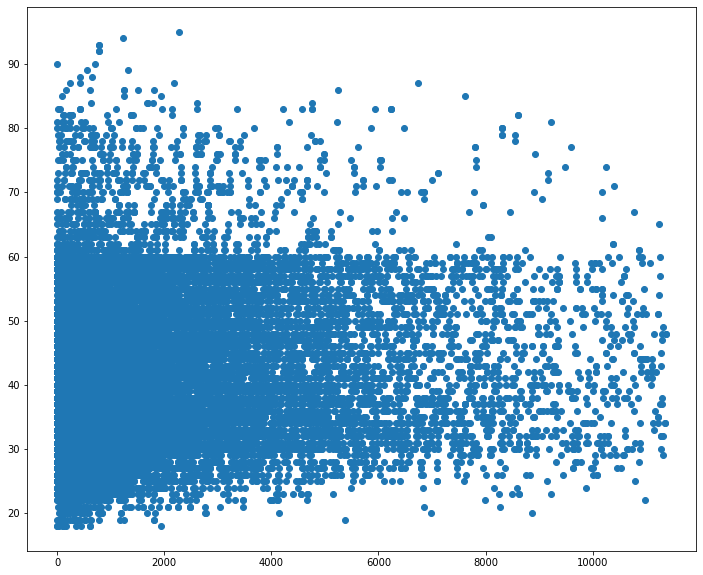

In [533]:
fig = plt.figure() 
fig.set_size_inches(12,10)
plt.scatter(x = result.balance, y = result.age)
plt.show()

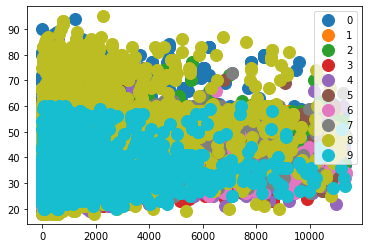

In [544]:
fig, ax = plt.subplots()
groups = result.groupby('cluster')
for name, group in groups:
    ax.plot(group.balance, group.age, marker='o', alpha = 1 , linestyle='', ms=12, label=name)
ax.legend()

plt.show()